# Credit Scoring Model
##### Для обучения модели использован метод логистической регресии библиотеки sklearn. Перед тем, как обучить модель, была проведена предварительная обработка данных с помощью нормализации. Результат выведен для тестовой выборки в виде 'ID':'Result'.

In [20]:
import pandas as pd
df = pd.read_csv('Dataset_scoring.csv', sep=';', error_bad_lines=False, decimal=',')
df.head()

,ID,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_BOOL,SIML,EDUCATION,TRANSPORT_AMOUNT,target,sample
0,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1.0,Train
1,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1.0,Train
2,6,1,1,1,0,0,25920.5195,37000.0000,0.0,0,38,3,0,1.0,Train
3,7,1,0,1,1,0,0.0000,16243.8096,7000.0,0,71,5,1,1.0,Train
4,8,1,1,1,0,0,17400.0000,17400.0000,0.0,0,59,3,3,1.0,Train


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2162 non-null   int64  
 1   SEX                    2162 non-null   int64  
 2   CHILD_BOOL             2162 non-null   int64  
 3   REALTY_BOOL            2162 non-null   int64  
 4   HAVE_ACCOUNT_BOOL      2162 non-null   int64  
 5   EMAIL_BOOL             2162 non-null   int64  
 6   DCI                    2162 non-null   float64
 7   PROFIT_FAMILY          2162 non-null   float64
 8   UCI                    2162 non-null   float64
 9   FOREIGN_PASSPORT_BOOL  2162 non-null   int64  
 10  SIML                   2162 non-null   float64
 11  EDUCATION              2162 non-null   int64  
 12  TRANSPORT_AMOUNT       2162 non-null   int64  
 13  target                 1513 non-null   float64
 14  sample                 2162 non-null   object 
dtypes: f

In [58]:
df.describe()

,ID,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_BOOL,SIML,EDUCATION,TRANSPORT_AMOUNT,target
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,1513.000000
mean,1081.500000,0.492137,0.516189,0.491674,0.094357,0.243293,0.011829,0.009022,4280.579867,0.152636,0.014003,4.354764,0.234968,0.500330
std,624.259962,0.500054,0.501702,0.500046,0.292392,0.429170,0.017965,0.019527,13972.508276,0.359720,0.016327,1.166574,0.459682,0.500165
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,541.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004437,0.003724,0.000000,0.000000,0.003652,3.000000,0.000000,0.000000
50%,1081.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.007757,0.006183,0.000000,0.000000,0.008708,5.000000,0.000000,1.000000
75%,1621.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.013337,0.009679,3300.000000,0.000000,0.016854,5.000000,0.000000,1.000000
max,2162.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.407080,0.622069,300000.000000,1.000000,0.111520,7.000000,3.000000,1.000000


Так как планируется использовать метод логистической регресии, необходимо произвести нормализацию данных, чтобы не терять в точности метода. Последние два столбца необходимо отсечь, так как они содержат символьные данные. Они будут запомнены и добавлены в dataframe обратно.

In [51]:
from sklearn import preprocessing
import numpy as np

In [60]:
target = df['target']
sample = df['sample']
col = df.columns.tolist()
col.pop(-1)
col.pop(-1)
col

['ID',
 'SEX',
 'CHILD_BOOL',
 'REALTY_BOOL',
 'HAVE_ACCOUNT_BOOL',
 'EMAIL_BOOL',
 'DCI',
 'PROFIT_FAMILY',
 'UCI',
 'FOREIGN_PASSPORT_BOOL',
 'SIML',
 'EDUCATION',
 'TRANSPORT_AMOUNT']

In [53]:
sample = df['sample']
df1 = df.drop(['sample', 'target'], axis=1)
scaled = preprocessing.normalize(df1)
scaled_df = pd.DataFrame(scaled, columns=col)
scaled_df

,ID,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_BOOL,SIML,EDUCATION,TRANSPORT_AMOUNT
0,0.436432,0.218216,0.218216,0.218216,0.000000,0.0,3.554372e-03,1.675325e-03,0.000000,0.218216,1.164670e-03,0.654648,0.436432
1,0.799994,0.000000,0.000000,0.000000,0.000000,0.0,3.306610e-03,1.324619e-03,0.000000,0.000000,1.123620e-03,0.599996,0.000000
2,0.866022,0.144337,0.144337,0.144337,0.000000,0.0,2.152354e-03,1.230778e-03,0.000000,0.000000,1.540720e-03,0.433011,0.000000
3,0.001000,0.000143,0.000000,0.000143,0.000143,0.0,0.000000e+00,5.347983e-07,0.999999,0.000000,2.849198e-06,0.000714,0.000143
4,0.867720,0.108465,0.108465,0.108465,0.000000,0.0,1.085753e-03,4.349500e-04,0.000000,0.000000,1.797646e-03,0.325395,0.325395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,0.999998,0.000464,0.000000,0.000000,0.000000,0.0,3.753818e-06,1.503817e-06,0.000000,0.000000,1.304721e-06,0.001858,0.000464
2158,0.142142,0.000066,0.000066,0.000066,0.000000,0.0,2.651341e-07,3.497879e-07,0.989846,0.000066,8.527014e-07,0.000330,0.000000
2159,0.999999,0.000000,0.000464,0.000464,0.000464,0.0,6.200454e-06,4.812439e-06,0.000000,0.000000,4.692641e-06,0.001392,0.000000
2160,0.999999,0.000463,0.000000,0.000000,0.000000,0.0,3.200655e-06,1.281533e-06,0.000000,0.000000,1.041360e-06,0.001390,0.000000


In [54]:
scaled_df.describe()

,ID,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_BOOL,SIML,EDUCATION,TRANSPORT_AMOUNT
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2.162000e+03,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000
mean,0.752789,0.001449,0.001259,0.001266,0.000175,0.000635,3.487584e-05,0.000021,0.278315,0.000323,0.000033,0.010136,0.000922
std,0.397060,0.010725,0.008505,0.009593,0.001971,0.007990,2.467581e-04,0.000118,0.442523,0.005065,0.000209,0.043211,0.013458
min,0.000957,0.000000,-0.001818,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000
25%,0.291424,0.000000,0.000000,0.000000,0.000000,0.000000,9.044124e-07,0.000001,0.000000,0.000000,0.000001,0.001188,0.000000
50%,0.999972,0.000000,0.000033,0.000000,0.000000,0.000000,5.119845e-06,0.000004,0.000000,0.000000,0.000005,0.002738,0.000000
75%,0.999995,0.000710,0.000655,0.000620,0.000000,0.000000,1.430654e-05,0.000009,0.954992,0.000000,0.000017,0.006056,0.000000
max,0.999999,0.267260,0.218216,0.267260,0.076696,0.267260,7.128670e-03,0.002856,1.000000,0.218216,0.006134,0.801780,0.436432


In [63]:
scaled_df['target'] = target
scaled_df['sample'] = sample
scaled_df.head()

,ID,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_BOOL,SIML,EDUCATION,TRANSPORT_AMOUNT,target,sample
0,0.436432,0.218216,0.218216,0.218216,0.000000,0.0,0.003554,1.675325e-03,0.000000,0.218216,0.001165,0.654648,0.436432,1.0,Train
1,0.799994,0.000000,0.000000,0.000000,0.000000,0.0,0.003307,1.324619e-03,0.000000,0.000000,0.001124,0.599996,0.000000,1.0,Train
2,0.866022,0.144337,0.144337,0.144337,0.000000,0.0,0.002152,1.230778e-03,0.000000,0.000000,0.001541,0.433011,0.000000,1.0,Train
3,0.001000,0.000143,0.000000,0.000143,0.000143,0.0,0.000000,5.347983e-07,0.999999,0.000000,0.000003,0.000714,0.000143,1.0,Train
4,0.867720,0.108465,0.108465,0.108465,0.000000,0.0,0.001086,4.349500e-04,0.000000,0.000000,0.001798,0.325395,0.325395,1.0,Train


Разделим обучающую и тестовую выборки в отдельные pandas.dataframe.

In [64]:
train = scaled_df[scaled_df['sample'] == 'Train']
test = scaled_df[scaled_df['sample'] == 'Test']

train.head()

,ID,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_BOOL,SIML,EDUCATION,TRANSPORT_AMOUNT,target,sample
0,0.436432,0.218216,0.218216,0.218216,0.000000,0.0,0.003554,1.675325e-03,0.000000,0.218216,0.001165,0.654648,0.436432,1.0,Train
1,0.799994,0.000000,0.000000,0.000000,0.000000,0.0,0.003307,1.324619e-03,0.000000,0.000000,0.001124,0.599996,0.000000,1.0,Train
2,0.866022,0.144337,0.144337,0.144337,0.000000,0.0,0.002152,1.230778e-03,0.000000,0.000000,0.001541,0.433011,0.000000,1.0,Train
3,0.001000,0.000143,0.000000,0.000143,0.000143,0.0,0.000000,5.347983e-07,0.999999,0.000000,0.000003,0.000714,0.000143,1.0,Train
4,0.867720,0.108465,0.108465,0.108465,0.000000,0.0,0.001086,4.349500e-04,0.000000,0.000000,0.001798,0.325395,0.325395,1.0,Train


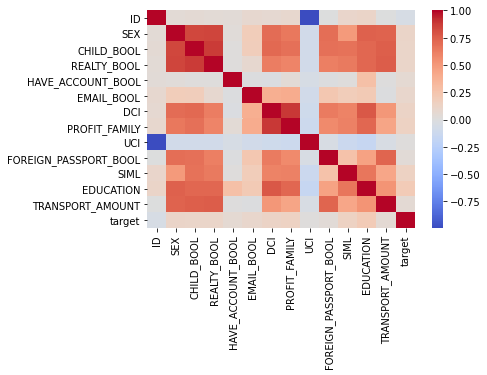

In [65]:
import seaborn as sns
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

Как можно заметить, целевой признак коррелирует одинаково почти со всеми признаками, кроме ID (что естественно и очевидно), UCI, FOREIGN_PASSPORT_BOOL и TRANSPORT_AMOUNT. Данные признаки не будут учитываться при обучении модели.

In [111]:
train_features = train.drop(['ID', 'DCI', 'FOREIGN_PASSPORT_BOOL', 'TRANSPORT_AMOUNT', 'sample', 'target'], axis=1)
train_target = train['target']
train_features.head()

,SEX,CHILD_BOOL,REALTY_BOOL,HAVE_ACCOUNT_BOOL,EMAIL_BOOL,PROFIT_FAMILY,UCI,SIML,EDUCATION
0,0.218216,0.218216,0.218216,0.000000,0.0,1.675325e-03,0.000000,0.001165,0.654648
1,0.000000,0.000000,0.000000,0.000000,0.0,1.324619e-03,0.000000,0.001124,0.599996
2,0.144337,0.144337,0.144337,0.000000,0.0,1.230778e-03,0.000000,0.001541,0.433011
3,0.000143,0.000000,0.000143,0.000143,0.0,5.347983e-07,0.999999,0.000003,0.000714
4,0.108465,0.108465,0.108465,0.000000,0.0,4.349500e-04,0.000000,0.001798,0.325395


In [112]:
features_arr = train_features.to_numpy()
target_arr = train_target.to_numpy()
features_arr

array([[2.18216058e-01, 2.18216058e-01, 2.18216058e-01, ...,
        0.00000000e+00, 1.16467017e-03, 6.54648173e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.12362038e-03, 5.99995815e-01],
       [1.44336952e-01, 1.44336952e-01, 1.44336952e-01, ...,
        0.00000000e+00, 1.54072019e-03, 4.33010857e-01],
       ...,
       [4.63175410e-04, 4.63175410e-04, 4.63175410e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.77905246e-03],
       [6.59854076e-05, 0.00000000e+00, 0.00000000e+00, ...,
        9.89781114e-01, 2.22429198e-07, 3.95912445e-04],
       [4.97103949e-05, 4.97103949e-05, 4.97103949e-05, ...,
        9.94207898e-01, 5.72524027e-07, 9.94207898e-05]])

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [114]:
model.fit(features_arr, target_arr)

LogisticRegression()

In [116]:
test_features = test.drop(['ID', 'DCI', 'FOREIGN_PASSPORT_BOOL', 'TRANSPORT_AMOUNT', 'sample', 'target'], axis=1)
test_arr = test_features.to_numpy()
test_predict = model.predict(test_arr)

In [117]:
test_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1.

Добавим результат в датафрейм для тестовой выборки в виде 'ID':'Result'.

In [153]:
df_test = df[df['sample'] == 'Test']
test_id = df_test['ID'].reset_index()
test_result = pd.Series(test_predict)
result = pd.concat([test_id['ID'], test_result], axis=1)
result

,ID,0
0,1,1.0
1,3,1.0
2,5,1.0
3,9,1.0
4,13,1.0
...,...,...
644,2153,0.0
645,2154,1.0
646,2155,0.0
647,2158,0.0
